# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [360]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = study_results.merge(mouse_metadata, how='left', on='Mouse ID')
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [343]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [344]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = df[df.duplicated()]
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [345]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = df.loc[df['Mouse ID'] == 'g989']
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [346]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop_duplicates()
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [361]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())-1

248

## Summary Statistics

In [348]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_df = cleaned_df.groupby(['Drug Regimen']).mean()
median_df = cleaned_df.groupby(['Drug Regimen']).median()
var_df = cleaned_df.groupby(['Drug Regimen']).var()
std_df = cleaned_df.groupby(['Drug Regimen']).std()
stderr_df = cleaned_df.groupby(['Drug Regimen']).sem()

stat_summary_df = pd.DataFrame(
    {"Mean Tumor Volume" : mean_df['Tumor Volume (mm3)'],
     "Median Tumor Volume" : median_df['Tumor Volume (mm3)'],
     "Tumor Volume Variance" :var_df['Tumor Volume (mm3)'],
     "Tumor Volume Std. Dev." : std_df['Tumor Volume (mm3)'],
     "Tumor Volume Std. Err." : stderr_df['Tumor Volume (mm3)'],
    
    },
)

stat_summary_df


C:\Users\Ryan Kracaw\AppData\Local\Temp\ipykernel_27136\1481573016.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = cleaned_df.groupby(['Drug Regimen']).mean()
C:\Users\Ryan Kracaw\AppData\Local\Temp\ipykernel_27136\1481573016.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = cleaned_df.groupby(['Drug Regimen']).median()
C:\Users\Ryan Kracaw\AppData\Local\Temp\ipykernel_27136\1481573016.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [349]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

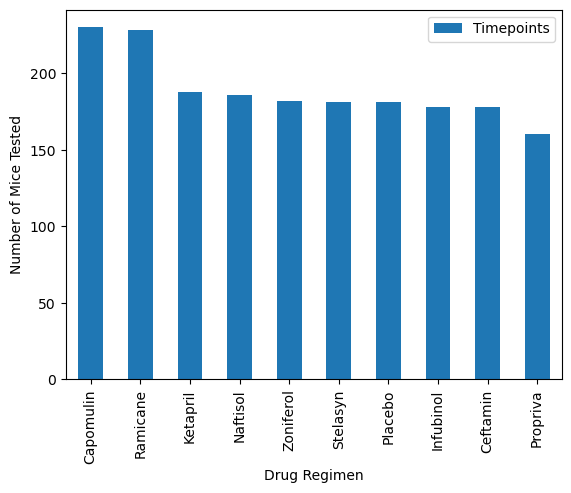

In [350]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using Pandas.
cleaned_df['Drug Regimen'].unique()
timepoints_list = []
for drug in cleaned_df['Drug Regimen'].unique():
    timepoints_list.append(len(cleaned_df.loc[cleaned_df['Drug Regimen']==drug]))

bar_df = pd.DataFrame(
    {"Drugs" : cleaned_df['Drug Regimen'].unique(),
     'Timepoints' : timepoints_list,
    
    },
)
bar_df = bar_df.sort_values('Timepoints', ascending=False)
panda_bar = bar_df.plot.bar(x='Drugs', y='Timepoints', xlabel="Drug Regimen", ylabel="Number of Mice Tested",)

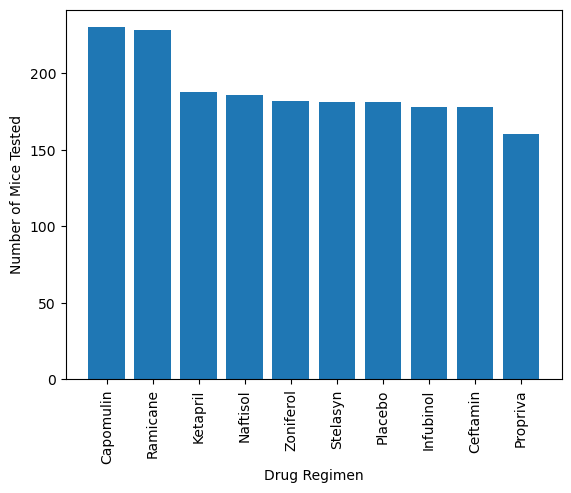

In [351]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using pyplot.
x_axis = np.arange(len(bar_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, bar_df['Timepoints'])
plt.xticks(tick_locations, bar_df['Drugs'], rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


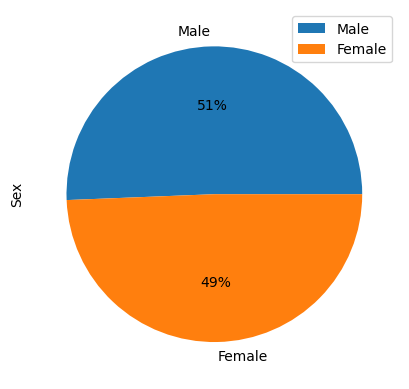

In [352]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexes_counts = cleaned_df['Sex'].value_counts()
sexes = ["Male", "Female"]
sexes_df = pd.DataFrame({
    "Sex" : sexes_counts,
}, index=["Male", "Female"])

plot = sexes_df.plot.pie(y='Sex', autopct='%1.0f%%')


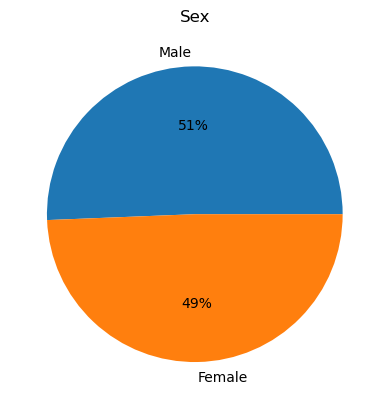

In [353]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sexes_counts, labels=sexes, autopct='%1.0f%%')
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [354]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')]
Ramicane = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Ramicane')]
Infubinol = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Infubinol')]
Ceftamin = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Ceftamin')]

drug_list = [Capomulin, Ramicane, Infubinol, Ceftamin]
master_list = []
for drug in drug_list:
    mouse_list = drug['Mouse ID'].unique()
    tumor_list = []
    for mouse in mouse_list:
        mice_df = drug.loc[drug['Mouse ID'] == mouse]
        max_time = mice_df['Timepoint'].max()
        max_tumor = mice_df.loc[mice_df['Timepoint'] == max_time]['Tumor Volume (mm3)'].mean()
        tumor_list.append(max_tumor)
    master_list.append(tumor_list)

tumor_df = pd.DataFrame({
    "Capomulin" : master_list[0],
    "Ramicane" : master_list[1],
    "Infubinol" : master_list[2],
    "Ceftamin" : master_list[3]
})

In [355]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
cap_tumor = tumor_df['Capomulin']
ram_tumor = tumor_df['Ramicane']
inf_tumor = tumor_df['Infubinol']
cef_tumor = tumor_df['Ceftamin']

# Capomulin
cap_quart = cap_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quart[0.25]
cap_upperq = cap_quart[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_outliers = []
for tumor in cap_tumor:
    if tumor > cap_upper_bound or tumor < cap_lower_bound:
        cap_outliers.append(tumor)
print(f"Capomulin's potential outliers: {cap_outliers}")

# Ramicane
ram_quart = ram_tumor.quantile([.25,.5,.75])
ram_iqr = ram_quart[0.75] - ram_quart[0.25]
ram_lower_bound = ram_quart[0.25] - (1.5*ram_iqr)
ram_upper_bound = ram_quart[0.75] + (1.5*ram_iqr)
ram_outliers = []
for tumor in ram_tumor:
    if tumor > ram_upper_bound or tumor < ram_lower_bound:
        ram_outliers.append(tumor)
print(f"Ramicane's potential outliers: {ram_outliers}")

# Infubinol
inf_quart = inf_tumor.quantile([.25,.5,.75])
inf_iqr = inf_quart[0.75] - inf_quart[0.25]
inf_lower_bound = inf_quart[0.25] - (1.5*inf_iqr)
inf_upper_bound = inf_quart[0.75] + (1.5*inf_iqr)
inf_outliers = []
for tumor in inf_tumor:
    if tumor > inf_upper_bound or tumor < inf_lower_bound:
        inf_outliers.append(tumor)
print(f"Infubinol's potential outliers: {inf_outliers}")

# Ceftamin
cef_quart = cef_tumor.quantile([.25,.5,.75])
cef_iqr = cef_quart[0.75] - cef_quart[0.25]
cef_lower_bound = cef_quart[0.25] - (1.5*cef_iqr)
cef_upper_bound = cef_quart[0.75] + (1.5*cef_iqr)
cef_outliers = []
for tumor in cef_tumor:
    if tumor > cef_upper_bound or tumor < cef_lower_bound:
        cef_outliers.append(tumor)
print(f"Ceftamin's potential outliers: {cef_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


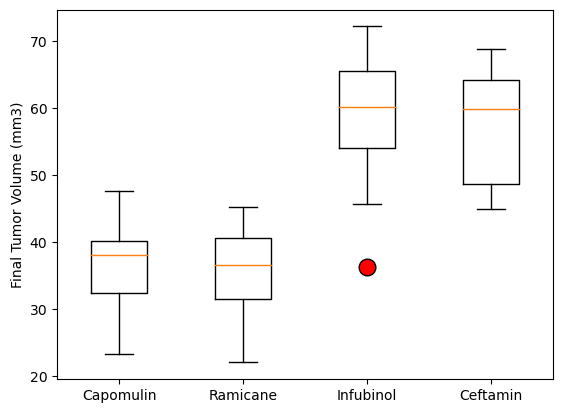

In [356]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_1 = tumor_df['Capomulin']
data_2 = tumor_df['Ramicane']
data_3 = tumor_df['Infubinol']
data_4 = tumor_df['Ceftamin']
data = [data_1, data_2, data_3, data_4]
drug_list_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.boxplot(data, labels=drug_list_labels, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

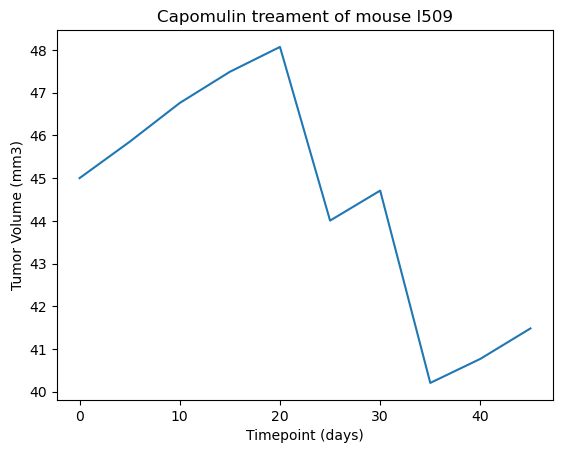

In [357]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_df = Capomulin.loc[Capomulin['Mouse ID'] == 'l509']
plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'])
plt.title("Capomulin treament of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


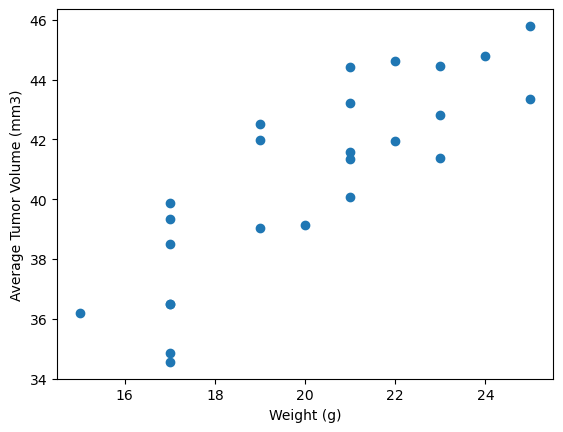

In [358]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = []
weight = []
for mouse in Capomulin['Mouse ID'].unique():
    avg = Capomulin.loc[Capomulin['Mouse ID'] == mouse]['Tumor Volume (mm3)'].mean()
    avg_tumor.append(avg)
    weight_ea = Capomulin.loc[Capomulin['Mouse ID'] == mouse]['Weight (g)'].mean()
    weight.append(weight_ea)


plt.scatter(weight,avg_tumor)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


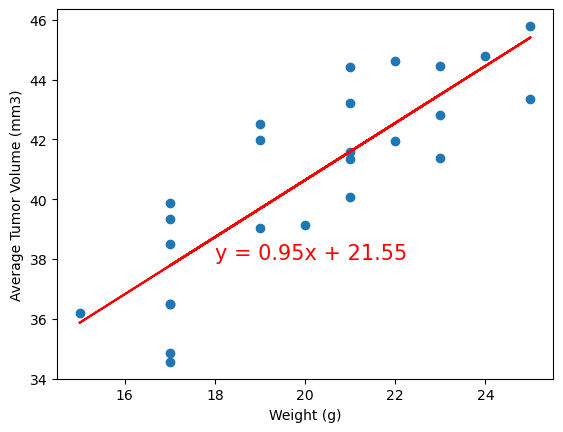

In [359]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = [int(a) for a in weight]
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [values * slope + intercept for values in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel('Weight (g)')
plt.show()